In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
pd.options.mode.chained_assignment = None
data = pd.read_csv('churn.all', sep= ",", header=0)
data['prediction'][data['prediction'] == ' True.'] = 1
data['prediction'][data['prediction'] == ' False.'] = 0
data['international plan'][data['international plan'] == ' no'] = 0
data['international plan'][data['international plan'] == ' yes'] = 1
data['voice mail plan'][data['voice mail plan'] == ' no'] = 0
data['voice mail plan'][data['voice mail plan'] == ' yes'] = 1
data['prediction'] = data['prediction'].astype('int', copy=False)
data['international plan'] = data['international plan'].astype('int', copy=False)
data['voice mail plan'] = data['voice mail plan'].astype('int', copy=False)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,day minutes,day calls,day charge,...,eve calls,eve charge,night minutes,night calls,night charge,intl minutes,intl calls,intl charge,number customer service calls,prediction
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# International plan influence

____mean____
international plan
0    0.112216
1    0.420719
Name: prediction, dtype: float64

____count____
international plan
0    4527
1     473
Name: prediction, dtype: int64


Text(0,0.5,'Occurences')

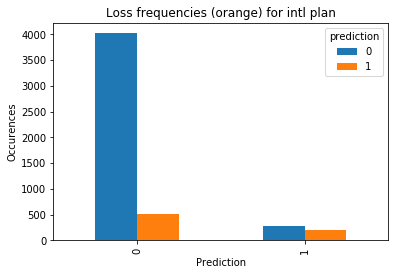

In [ ]:
print("____mean____")
print(data.groupby('international plan').mean()['prediction'])
print("\n____count____")
print(data.groupby('international plan').count()['prediction'])

pd.crosstab(data['international plan'],data['prediction']).plot(kind='bar')
plt.title('Loss frequencies (orange) for intl plan')
plt.xlabel('Prediction')
plt.ylabel('Occurences')

From this graph and mean calculation we can see how many customers are influenced by international plan feature.<br>
42% of those who have international plan, are the ones who are predicted as loss(1) <br>and from those who have no international plan, 11% are predicted as loss(1).<br>Frequency of customer loss depends alot on the international plan because there is big difference between these two means and therefore, this feature is good predictor of the outcome value. 


# Voice mail plan influence

____mean____
voice mail plan
0    0.164536
1    0.077098
Name: prediction, dtype: float64

____count____
voice mail plan
0    3677
1    1323
Name: prediction, dtype: int64


Text(0,0.5,'Occurences')

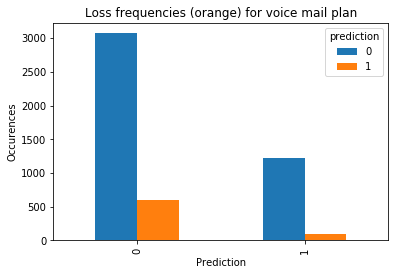

In [ ]:
print("____mean____")
print(data.groupby('voice mail plan').mean()['prediction'])
print("\n____count____")
print(data.groupby('voice mail plan').count()['prediction'])

pd.crosstab(data['voice mail plan'],data['prediction']).plot(kind='bar')
plt.title('Loss frequencies (orange) for voice mail plan')
plt.xlabel('Prediction')
plt.ylabel('Occurences')

Similarly as internation plan feature, voice mail plan could also be a good predictor as there is big difference between percentages.<br>
16,4% of customers who have no voice mail plan are predicted as loss(1)<br>
7,7%  of customers who have    voice mail plan are predicted as loss(1)

Recommendation suggestion could be used on customers who have no voice mail plan!

# Number vmail messages and number customer service calls influence

In [ ]:
data.groupby('prediction').mean()[['number vmail messages', 'number customer service calls']]

,number vmail messages,number customer service calls
prediction,,
0,8.291870,1.457722
1,4.496464,2.254597


This table shows another two continuous features which could have big impact on predictions.<br>
Customers whose target value is 0(not leaving) have nearly 2x bigger number of vmail messages at an average.<br>
Similarly in contrast, number of average customer service calls are less than from customers whose target value is 1(loss).

# intl minutes and intl charge are corellating

Text(0,0.5,'Frequencies')

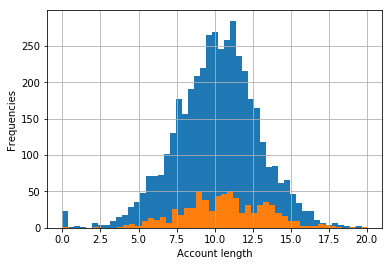

In [ ]:
data[data['prediction'] == 0]['intl minutes'].hist(bins = 50)
plt.xlabel('Account length')
plt.ylabel('Frequencies')
data[data['prediction'] == 1]['intl minutes'].hist(bins = 50)
plt.xlabel('Account length')
plt.ylabel('Frequencies')

Text(0,0.5,'Frequencies')

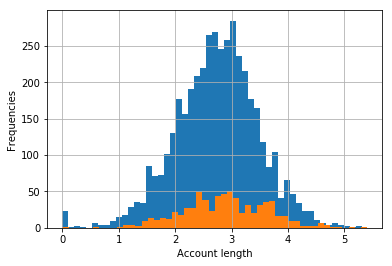

In [ ]:
data[data['prediction'] == 0]['intl charge'].hist(bins = 50)
plt.xlabel('Account length')
plt.ylabel('Frequencies')

data[data['prediction'] == 1]['intl charge'].hist(bins = 50)
plt.xlabel('Account length')
plt.ylabel('Frequencies')

These two graphs are showing correlations between intl attributes which have charge and minutes amount. As these amount of minutes increase, so do the charges. This also applies for other features as day/eve/night minutes/charges. That may mean that we could drop these attributes as they dont have much information gain for logistic regression.<br>
Along with these attributes, without looking into deeper concepts of data-mining, we can discard attributes like state, account length, area code and phone number.

In [ ]:
data.drop(['state', 'account length', 'area code', 
           'phone number', 'day minutes', 'eve minutes', 
           'night minutes', 'intl minutes'], axis=1, inplace=True)
data.head()

,international plan,voice mail plan,number vmail messages,day calls,day charge,eve calls,eve charge,night calls,night charge,intl calls,intl charge,number customer service calls,prediction
0,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [ ]:
y = data['prediction'].values
data.drop('prediction', axis=1, inplace=True)
X = data.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=None)
LG = LogisticRegression()
LG.fit(Xtrain, ytrain)
ypred = LG.predict(Xtest)

print('Accuracy: {}\n'.format(LG.score(Xtest, ytest)))
print(metrics.classification_report(ytest, ypred, [0, 1]))

Accuracy: 0.8652

             precision    recall  f1-score   support

          0       0.88      0.98      0.93      2151
          1       0.57      0.15      0.23       349

avg / total       0.83      0.87      0.83      2500



Low recall at 1(loss) target value means we've missed alot of REALLY true(1) values. Predictor considered alot of true values as negativne ones. This might be fixed by making normalization of some attributes, for example those which have much bigger values compared to others by reducing them for example by logarithm or square root functions.
